In [7]:
import pandas as pd
import numpy as np
import scipy as sp
import sklearn as skl
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


In [8]:
#uploading dataset
parkinson = pd.read_csv('pd_speech_features.csv')
print(parkinson.head())




   gender      PPE      DFA     RPDE  numPulses  numPeriodsPulses  \
0       1  0.85247  0.71826  0.57227        240               239   
1       1  0.76686  0.69481  0.53966        234               233   
2       1  0.85083  0.67604  0.58982        232               231   
3       0  0.41121  0.79672  0.59257        178               177   
4       0  0.32790  0.79782  0.53028        236               235   

   meanPeriodPulses  stdDevPeriodPulses  locPctJitter  locAbsJitter  ...  \
0          0.008064            0.000087       0.00218      0.000018  ...   
1          0.008258            0.000073       0.00195      0.000016  ...   
2          0.008340            0.000060       0.00176      0.000015  ...   
3          0.010858            0.000183       0.00419      0.000046  ...   
4          0.008162            0.002669       0.00535      0.000044  ...   

   tqwt_kurtosisValue_dec_28  tqwt_kurtosisValue_dec_29  \
0                     1.5620                     2.6445   
1         

In [9]:
#summary stat
summary_stats = parkinson.describe()
print(summary_stats)


           gender         PPE         DFA        RPDE   numPulses  \
count  756.000000  756.000000  756.000000  756.000000  756.000000   
mean     0.515873    0.746284    0.700414    0.489058  323.972222   
std      0.500079    0.169294    0.069718    0.137442   99.219059   
min      0.000000    0.041551    0.543500    0.154300    2.000000   
25%      0.000000    0.762833    0.647053    0.386537  251.000000   
50%      1.000000    0.809655    0.700525    0.484355  317.000000   
75%      1.000000    0.834315    0.754985    0.586515  384.250000   
max      1.000000    0.907660    0.852640    0.871230  907.000000   

       numPeriodsPulses  meanPeriodPulses  stdDevPeriodPulses  locPctJitter  \
count        756.000000        756.000000          756.000000    756.000000   
mean         322.678571          0.006360            0.000383      0.002324   
std           99.402499          0.001826            0.000728      0.002628   
min            1.000000          0.002107            0.000011 

In [10]:
#finding missing values in the dataset
missing_values = parkinson.isnull().sum()
print(missing_values)

gender                       0
PPE                          0
DFA                          0
RPDE                         0
numPulses                    0
                            ..
tqwt_kurtosisValue_dec_33    0
tqwt_kurtosisValue_dec_34    0
tqwt_kurtosisValue_dec_35    0
tqwt_kurtosisValue_dec_36    0
class                        0
Length: 754, dtype: int64


In [11]:
from sklearn.feature_selection import SelectFromModel, SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Separating features and target variable
X = parkinson.drop(columns=['class'])  # Features
y = parkinson['class']  # Target variable

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# L1-based feature selection (LASSO)
lasso_model = LogisticRegression(penalty='l1', solver='liblinear', C=0.1)
lasso_selector = SelectFromModel(lasso_model)
X_lasso = lasso_selector.fit_transform(X_scaled, y)

# Univariate feature selection
k_best_selector = SelectKBest(score_func=f_classif, k=20)  # Select top 20 features
X_kbest = k_best_selector.fit_transform(X_scaled, y)

# Print selected features
lasso_selected_features = X.columns[lasso_selector.get_support()]
print("LASSO selected features:", lasso_selected_features)

kbest_selected_features = X.columns[k_best_selector.get_support()]
print("KBest selected features:", kbest_selected_features)


LASSO selected features: Index(['DFA', 'b4', 'GNE_NSR_TKEO', 'IMF_SNR_SEO', 'mean_MFCC_1st_coef',
       'mean_MFCC_6th_coef', 'mean_MFCC_7th_coef', 'mean_MFCC_8th_coef',
       'mean_MFCC_10th_coef', 'mean_delta_log_energy', 'mean_2nd_delta',
       'mean_10th_delta_delta', 'mean_11th_delta_delta', 'std_MFCC_2nd_coef',
       'std_8th_delta', 'std_9th_delta', 'std_delta_delta_log_energy',
       'std_6th_delta_delta', 'std_7th_delta_delta', 'std_9th_delta_delta',
       'det_LT_entropy_shannon_4_coef', 'tqwt_energy_dec_11',
       'tqwt_energy_dec_15', 'tqwt_energy_dec_19', 'tqwt_energy_dec_25',
       'tqwt_entropy_shannon_dec_23', 'tqwt_entropy_shannon_dec_25',
       'tqwt_entropy_shannon_dec_34', 'tqwt_entropy_shannon_dec_35',
       'tqwt_entropy_log_dec_26', 'tqwt_entropy_log_dec_28',
       'tqwt_entropy_log_dec_33', 'tqwt_TKEO_mean_dec_17',
       'tqwt_TKEO_mean_dec_21', 'tqwt_TKEO_mean_dec_27',
       'tqwt_TKEO_std_dec_11', 'tqwt_TKEO_std_dec_12',
       'tqwt_medianValue_d

In [12]:
from sklearn.model_selection import train_test_split

# Train-test split for LASSO selected features
X_train_lasso, X_test_lasso, y_train, y_test = train_test_split(X_lasso, y, test_size=0.2, random_state=42)

print("Shape of X_train_lasso:", X_train_lasso.shape)
print("Shape of X_test_lasso:", X_test_lasso.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)



Shape of X_train_lasso: (604, 64)
Shape of X_test_lasso: (152, 64)
Shape of y_train: (604,)
Shape of y_test: (152,)


In [13]:

# Instantiate and train SVM classifier with LASSO selected features
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_lasso, y_train)


SVC(kernel='linear')

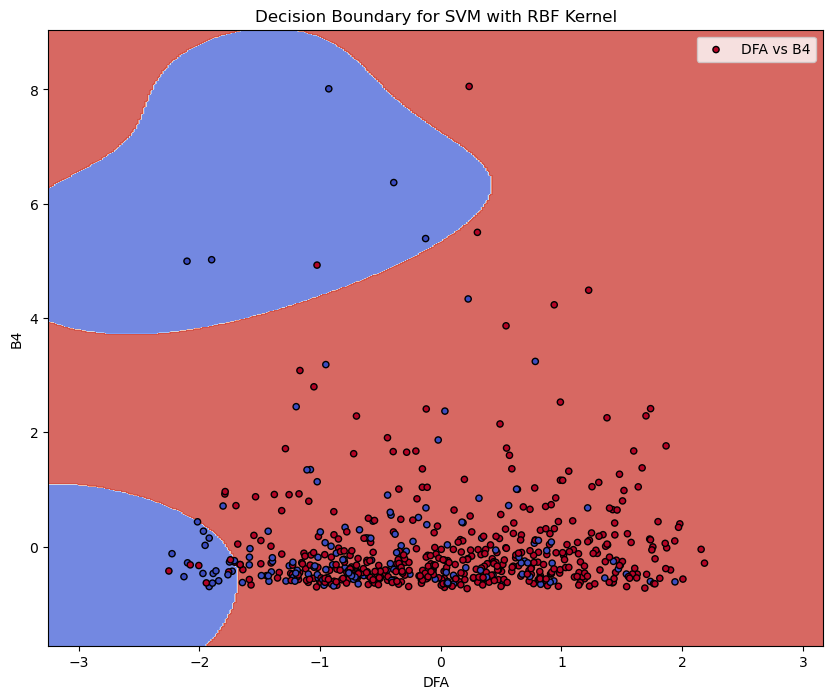

In [14]:

# Instantiate SVM classifier with RBF kernel
svm_classifier_rbf = SVC(kernel='rbf', random_state=42)

# Generate a grid of points covering the feature space
h = 0.02  # step size in the mesh
x_min, x_max = X_train_lasso[:, 0].min() - 1,  X_train_lasso[:, 0].max() + 1
y_min, y_max = X_train_lasso[:, 1].min() - 1,  X_train_lasso[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Train the SVM classifier on the selected features
svm_classifier_rbf.fit(X_train_lasso[:, :2], y_train)

# Predict class labels for each point in the grid
Z = svm_classifier_rbf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot training points
plt.scatter(X_train_lasso[:, 0], X_train_lasso[:, 1], c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k', label='DFA vs B4')
plt.title('Decision Boundary for SVM with RBF Kernel')
plt.xlabel('DFA')
plt.ylabel('B4')
plt.legend()
plt.show()


In [15]:

# Instantiate Random Forest classifier
rf_classifier = RandomForestClassifier()

# Train Random Forest classifier on the selected features
rf_classifier.fit(X_train_lasso, y_train)

RandomForestClassifier()

In [16]:
treepark = skl.tree.DecisionTreeClassifier()
treepark.fit(X_train_lasso, y_train)

DecisionTreeClassifier()

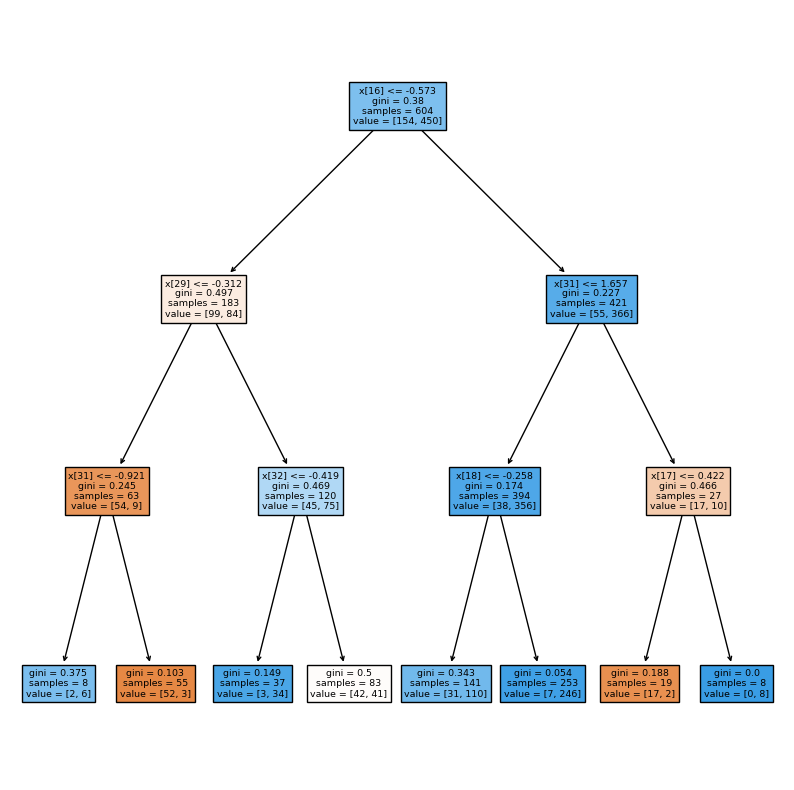

In [17]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Create and fit the decision tree classifier with limited depth
treepark = DecisionTreeClassifier(max_depth=3)
treepark.fit(X_train_lasso, y_train)

# Plot the decision tree
plt.figure(figsize=[10,10])
plot_tree(treepark, filled=True)
plt.show()



In [29]:

# Instantiate KNN classifier with hyperparameters
for k in [1, 3, 5, 7, 9, 11]:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train_lasso, y_train)




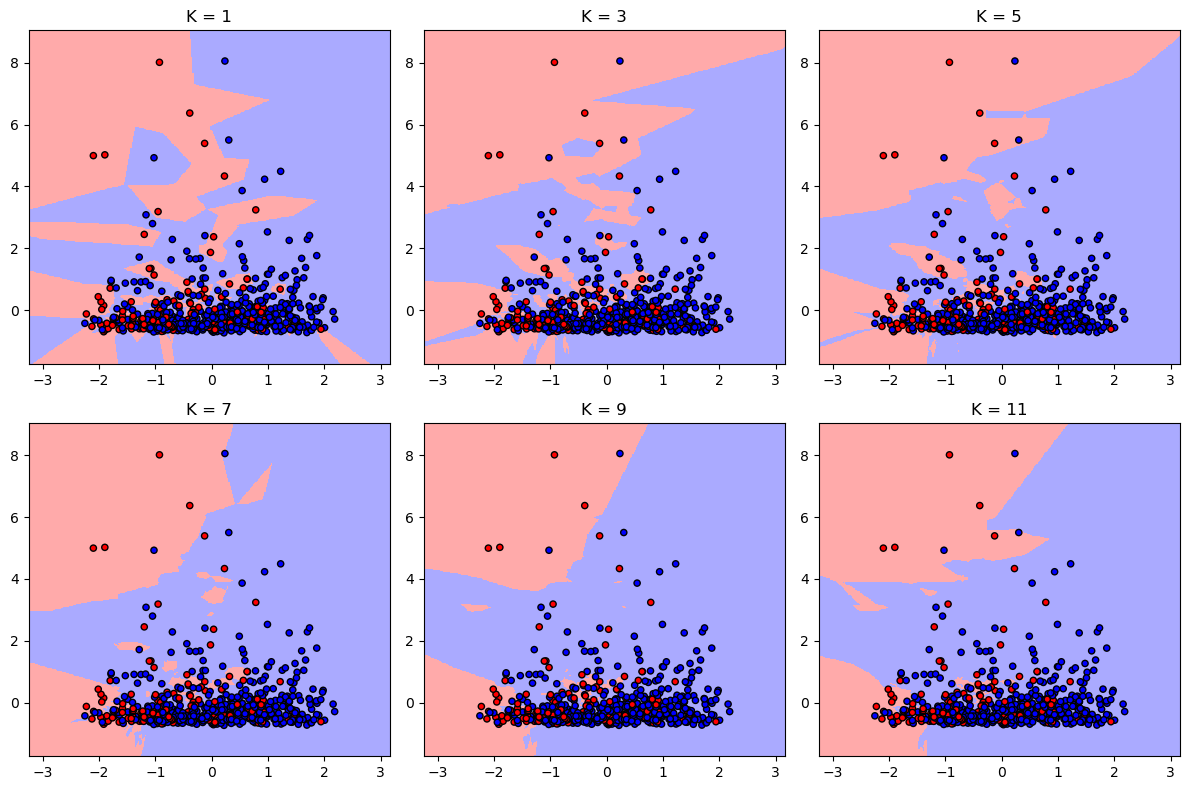

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier

# Instantiate KNN classifier with varying values of k
ks = [1, 3, 5, 7, 9, 11]
classifiers = []

for k in ks:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train_lasso[:, :2], y_train)  # Use only the first two features
    classifiers.append(knn_classifier)

# Define step size in the mesh
h = .02  

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Set up the figure
plt.figure(figsize=(12, 8))

# Plot the decision boundaries for each k
for i, knn_classifier in enumerate(classifiers):
    plt.subplot(2, 3, i+1)
    
    # Plot the decision boundary by assigning a color to each point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X_train_lasso[:, 0].min() - 1, X_train_lasso[:, 0].max() + 1
    y_min, y_max = X_train_lasso[:, 1].min() - 1, X_train_lasso[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Predict the class for each point on the grid
    Z = knn_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    
    # Plot the training points
    plt.scatter(X_train_lasso[:, 0], X_train_lasso[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("K = %i" % (ks[i]))

plt.tight_layout()
plt.show()


In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Define the KNN classifier
knn_classifier = KNeighborsClassifier()

# Define the range of k values
k_values = [1, 3, 5, 7, 9, 11]

# Perform k-fold cross-validation for each value of k
for k in k_values:
    knn_classifier.n_neighbors = k
    scores = cross_val_score(knn_classifier, X_train_lasso, y_train, cv=5)  # Change cv as needed
    print(f'Cross-validation scores for k={k}: {scores}')
    print(f'Mean cross-validation score for k={k}: {scores.mean()}')


Cross-validation scores for k=1: [0.85950413 0.89256198 0.83471074 0.90909091 0.9       ]
Mean cross-validation score for k=1: 0.8791735537190084
Cross-validation scores for k=3: [0.83471074 0.90909091 0.81818182 0.90909091 0.85      ]
Mean cross-validation score for k=3: 0.8642148760330578
Cross-validation scores for k=5: [0.85950413 0.88429752 0.80991736 0.92561983 0.85833333]
Mean cross-validation score for k=5: 0.8675344352617079
Cross-validation scores for k=7: [0.85950413 0.87603306 0.80991736 0.92561983 0.825     ]
Mean cross-validation score for k=7: 0.8592148760330579
Cross-validation scores for k=9: [0.85950413 0.87603306 0.80991736 0.90909091 0.825     ]
Mean cross-validation score for k=9: 0.8559090909090908
Cross-validation scores for k=11: [0.85950413 0.88429752 0.85950413 0.90082645 0.825     ]
Mean cross-validation score for k=11: 0.8658264462809917


In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# Function to evaluate and print metrics for a given classifier
def evaluate_classifier(classifier, X_test_lasso, y_test):
    # Predict on the test set
    y_pred = classifier.predict(X_test_lasso)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)
    
    # Print the evaluation metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print("Confusion Matrix:")
    print(confusion_mat)

# Evaluate SVM classifier
print("Evaluation metrics for SVM classifier:")
evaluate_classifier(svm_classifier, X_test_lasso, y_test)
print()

# Evaluate Random Forest classifier
print("Evaluation metrics for Random Forest classifier:")
evaluate_classifier(rf_classifier, X_test_lasso, y_test)
print()

# Fit KNN classifier with all 64 features
knn_classifier.fit(X_train_lasso, y_train)

# Evaluate KNN classifier
print("Evaluation metrics for KNN classifier:")
evaluate_classifier(knn_classifier, X_test_lasso, y_test)


Evaluation metrics for SVM classifier:
Accuracy: 0.8881578947368421
Precision: 0.9008264462809917
Recall: 0.956140350877193
F1-score: 0.927659574468085
Confusion Matrix:
[[ 26  12]
 [  5 109]]

Evaluation metrics for Random Forest classifier:
Accuracy: 0.881578947368421
Precision: 0.8809523809523809
Recall: 0.9736842105263158
F1-score: 0.925
Confusion Matrix:
[[ 23  15]
 [  3 111]]

Evaluation metrics for KNN classifier:
Accuracy: 0.881578947368421
Precision: 0.875
Recall: 0.9824561403508771
F1-score: 0.9256198347107438
Confusion Matrix:
[[ 22  16]
 [  2 112]]


In [41]:
from sklearn.model_selection import cross_val_score
# Function to perform cross-validation and print mean accuracy
def perform_cross_validation(classifier, X, y, cv=5):
    cv_scores = cross_val_score(classifier, X, y, cv=cv, scoring='accuracy')
    print("Cross-Validation Accuracy (mean):", cv_scores.mean())

# Perform cross-validation for SVM classifier
print("Cross-validation for SVM classifier:")
perform_cross_validation(svm_classifier, X_train_lasso, y_train)
print()

# Perform cross-validation for Random Forest classifier
print("Cross-validation for Random Forest classifier:")
perform_cross_validation(rf_classifier, X_train_lasso, y_train)
print()


Cross-validation for SVM classifier:
Cross-Validation Accuracy (mean): 0.8708815426997244

Cross-validation for Random Forest classifier:
Cross-Validation Accuracy (mean): 0.8658402203856749



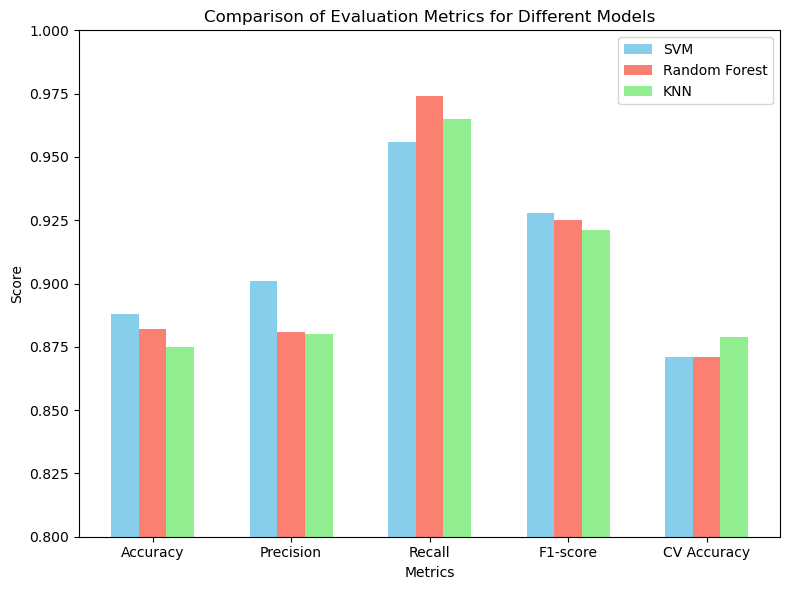

In [43]:

# Define evaluation metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'CV Accuracy']
svm_metrics = [0.888, 0.901, 0.956, 0.928, 0.871]
rf_metrics = [0.882, 0.881, 0.974, 0.925, 0.871]
knn_metrics = [0.875, 0.880, 0.965, 0.921, 0.879]

# Define x-axis positions for bar plots
x = np.arange(len(metrics))

# Plotting
plt.figure(figsize=(8, 6))

plt.bar(x - 0.2, svm_metrics, width=0.2, label='SVM', color='skyblue')
plt.bar(x, rf_metrics, width=0.2, label='Random Forest', color='salmon')
plt.bar(x + 0.2, knn_metrics, width=0.2, label='KNN', color='lightgreen')

plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Comparison of Evaluation Metrics for Different Models')
plt.xticks(x, metrics)
plt.legend(loc='upper right', bbox_to_anchor=(1, 1))
plt.ylim(0.8, 1)  # Limit y-axis from 0 to 1
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()



AUC and ROC curve for SVM classifier:
AUC: 0.9367497691597413


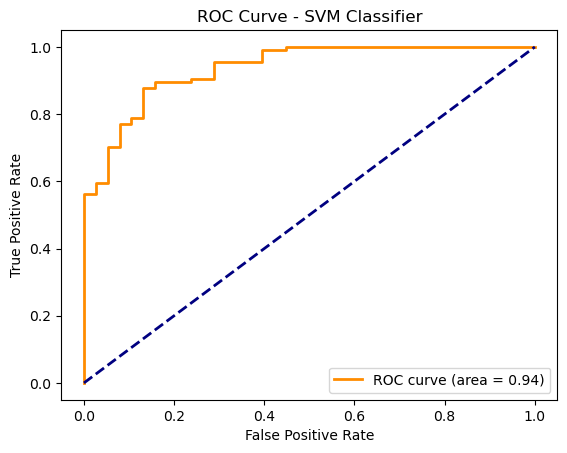


AUC and ROC curve for Random Forest classifier:
AUC: 0.9358264081255772


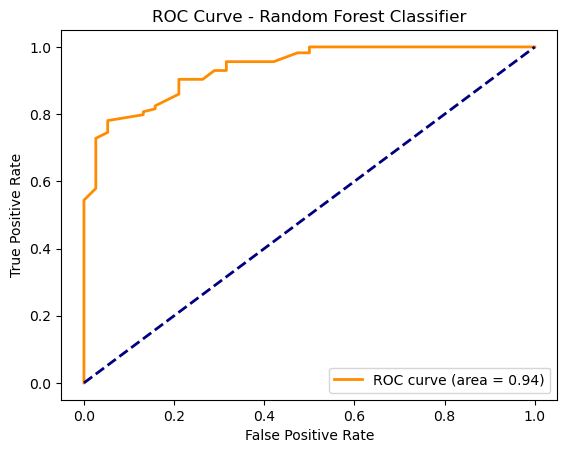


AUC and ROC curve for KNN classifier:
AUC: 0.9158587257617729


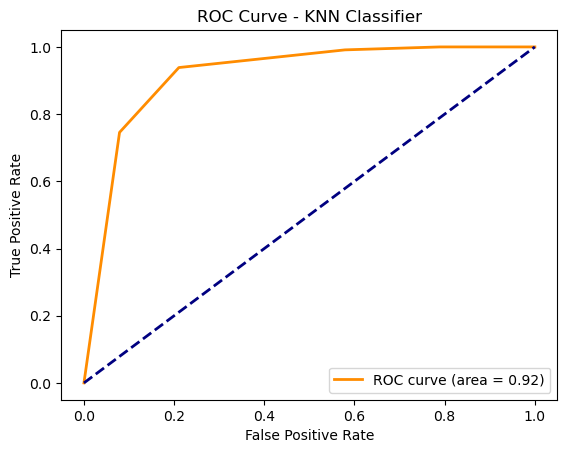

In [57]:
# Function to calculate AUC and plot ROC curve
def calculate_auc_roc(classifier, X_test_lasso, y_test, title):
    # Predict probabilities
    y_pred_proba = classifier.predict_proba(X_test_lasso)[:, 1]
    
    # Calculate AUC
    auc = roc_auc_score(y_test, y_pred_proba)
    print("AUC:", auc)
    
    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)  # Set the title dynamically
    plt.legend(loc="lower right")
    plt.show()

# Instantiate SVM classifier with probability estimates enabled
svm_classifier = SVC(kernel='linear', probability=True, random_state=42)

# Fit SVM classifier to training data
svm_classifier.fit(X_train_lasso, y_train)

# Now, calculate AUC and plot ROC curve for SVM classifier
print("AUC and ROC curve for SVM classifier:")
calculate_auc_roc(svm_classifier, X_test_lasso, y_test, "ROC Curve - SVM Classifier")
print()

# Calculate AUC and plot ROC curve for Random Forest classifier
print("AUC and ROC curve for Random Forest classifier:")
calculate_auc_roc(rf_classifier, X_test_lasso, y_test, "ROC Curve - Random Forest Classifier")
print()

# Calculate AUC and plot ROC curve for KNN classifier
print("AUC and ROC curve for KNN classifier:")
calculate_auc_roc(knn_classifier, X_test_lasso, y_test, "ROC Curve - KNN Classifier")

